### Will Duffy 97180025-7
### Theoretical Astrophysics
### Midterm

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 2

In [106]:
"""Solves Kepler Equation for a given mean anomaly (M) and eccentricity (ecc)
   plug in the desired n step you'd like to go to"""

def solver(n, M, ecc):
    E = 0
    if n == 1:
        return M
    else:
        E += M + ecc*sin(solver(n-1, M, ecc))
        return E

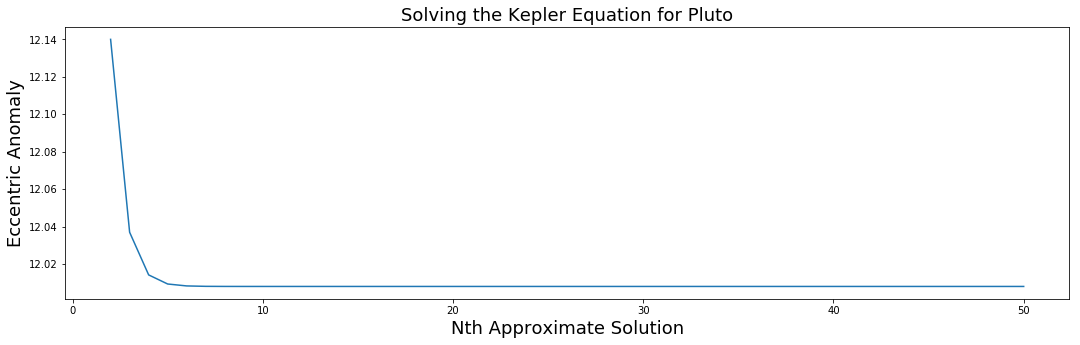

In [108]:
# num is a list of numbers [1, 50] that represents the nth step in solving the Kepler Equation
num = np.arange(1,51,1)

# vals starts as a list of fifty entires with nothing in them
# then sets the first one (at index 0) to the n = 1 step of the Kepler Equation, the second entry (index 1) to the n = 2
# step, and so on
vals= [None] * 50
for i in range(1, 50):
    vals[i] = solver(i, 12.14, .249)
    
fig=plt.figure(1,figsize=(18,5))  #Numbers in parentheses determine the dimensions of the plot
ax1=fig.add_subplot(111)          #11 Means make a grid 1 plot box wide by 1 box tall.  
                                  #The final 1 means let ax1 be the first plot box.
    
ax1.plot(num, vals)

ax1.set_title('Solving the Kepler Equation for Pluto', fontsize=18)
ax1.set_xlabel('Nth Approximate Solution', fontsize=18)
ax1.set_ylabel('Eccentric Anomaly', fontsize=18)

In [109]:
solver(200, 12.14, .249)

12.008099590264678

### Therefore, the eccentric anomaly of Pluto with the uncertainty of 0.001 = 12.001 degrees.

In [110]:
""""Demonstrating the decay of error""""

def error(n, M, ecc):
    E = 1
    if n == 1:
        return 12.14 - 12.008099590264678
    else:
        E = ecc*cos(solver(n, M, ecc))*error(n-1, M, ecc)
        return E

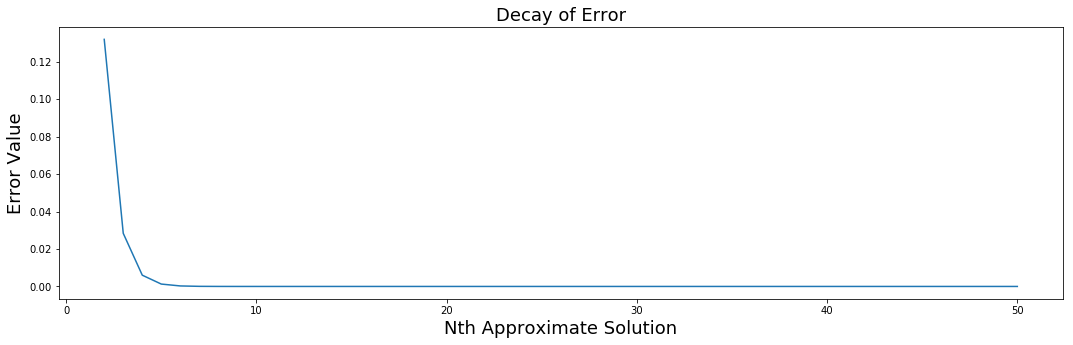

In [111]:
# num is a list of numbers [1, 50] that represents the nth step in calculating the rror
num = np.arange(1,51,1)

# vals starts as a list of fifty entires with nothing in them
# then sets the first one (at index 0) to the n = 1 step of the error, the second entry (index 1) to the n = 2
# step, and so on
errVals= [None] * 50
for i in range(1, 50):
    errVals[i] = error(i, 12.14, .249)
    
fig2=plt.figure(1,figsize=(18,5))  
ax2=fig2.add_subplot(111)          
    
ax2.plot(num, errVals)

ax2.set_title('Decay of Error', fontsize=18)
ax2.set_xlabel('Nth Approximate Solution', fontsize=18)
ax2.set_ylabel('Error Value', fontsize=18)

As we use a higher order nth approximation, we can clearly see that error decreases.

### Problem 3

$X(t)=\sum_{j=1}^4 \alpha_{j}e^{{\lambda_j}t}$  
$Y(t)=\sum_{j=1}^4 \beta_{j}e^{{\lambda_j}t}$  

$\dot{X}(t)=\sum_{j=1}^4 \alpha_{j}\lambda_{j}e^{{\lambda_j}t}$  
$\dot{Y}(t)=\sum_{j=1}^4 \beta_{j}\lambda_{j}e^{{\lambda_j}t}$ 

$\ddot{X}(t)=\sum_{j=1}^4 \alpha_{j}\lambda_{j}^2e^{{\lambda_j}t}$  
$\ddot{Y}(t)=\sum_{j=1}^4 \beta_{j}\lambda_{j}^2e^{{\lambda_j}t}$   

$\ddot{X} - 2\Omega \dot{Y} + aX + bY = 0$     

Using the above equations to substitute into the last one yields   
$\sum_{j=1}^4 [ \alpha_{j}\lambda_{j}^2 - 2\Omega \beta_{j}\lambda_{j} + a\alpha_j + b\beta_j]e^{{\lambda_j}t} = 0$   thus,   

$\alpha_{j}\lambda_{j}^2 - 2\Omega \beta_{j}\lambda_{j} + a\alpha_j + b\beta_j = 0$   which can be expressed as   

$\alpha_{1}\lambda_{1}^2 - 2\Omega \beta_{1}\lambda_{1} + a\alpha_1 + b\beta_1 = 0$   
$\alpha_{2}\lambda_{2}^2 - 2\Omega \beta_{2}\lambda_{2} + a\alpha_2 + b\beta_2 = 0$   
$\alpha_{3}\lambda_{3}^2 - 2\Omega \beta_{3}\lambda_{3} + a\alpha_3 + b\beta_3 = 0$   
$\alpha_{4}\lambda_{4}^2 - 2\Omega \beta_{4}\lambda_{4} + a\alpha_4 + b\beta_4 = 0$   

To satisfy these equations, $\alpha_3 = \alpha_4 = \beta_3 = \beta_4 = 0$   and   
$\alpha_1 = \alpha_2$   

Therefore $X(t) =\sum_{j=1}^2 \alpha_{j}e^{{\lambda_j}t} = \alpha_1 e^{{\lambda_1}t} + \alpha_2 e^{{\lambda_2}t} = \alpha_1 ( e^{{\lambda_1}t} + e^{{\lambda_2}t}) $

With the knowledge that $\alpha_1 = \alpha_2$ ,   
$\alpha_{1}\lambda_{1}^2 - 2\Omega \beta_{1}\lambda_{1} + a\alpha_1 + b\beta_1 = 0$   and   
$\alpha_{2}\lambda_{2}^2 - 2\Omega \beta_{2}\lambda_{2} + a\alpha_2 + b\beta_2 = 0$ can be solved for $\beta_1$ and $\beta_2$.   

$\beta_1 = \dfrac{\alpha_1 (a + \lambda_1^2)}{2\lambda_1\Omega - b}$   
$\beta_2 = \dfrac{\alpha_1 (a + \lambda_2^2)}{2\lambda_2\Omega - b}$   

$Y(t)=\sum_{j=1}^2 \beta_{j}e^{{\lambda_j}t} = \beta_1e^{{\lambda_1}t} + \beta_2e^{{\lambda_2}t} = \alpha_1(a+\lambda_1^2) (\dfrac{e^{\lambda_1t}}{2\lambda_1\Omega - b} + \dfrac{e^{\lambda_2t}}{2\lambda_2\Omega - b})$   

Using Euler's formula, we can rewrite the fraction based on the following. Noting that $\lambda_1 = -\lambda_2$ and $\lambda_1 = ix$ where $x$ is the real component.     

$\dfrac{e^{\lambda_1t}}{2\lambda_1\Omega - b} - \dfrac{e^{-\lambda_1t}}{2\lambda_1\Omega + b} = \dfrac{cos(xt) + isin(xt)}{2ix\Omega - b} - \dfrac{cos(xt) - isin(xt)}{2ix\Omega + b} = \dfrac{4x\Omega sin(xt) - 2bcos(xt)}{4x^2\Omega^2 + b^2} $   

Thus, $Y(t) = \alpha_1 (a+\lambda_1^2)\dfrac{4x\Omega sin(xt) - 2bcos(xt)}{4x^2\Omega^2 + b^2}$ which consists only of real numbers.   

### Solving for the constants

$\nu = \dfrac{m_J}{M_s+m_J} = 9.54*10^{-4} < 0.0385$ so a stable equilibrium is expected.      
$\Omega = \sqrt{\dfrac{G(M_s+m_J)}{r_{12}^3}} = \sqrt{\dfrac{6.674×10^{-11} \frac{Nm^2}{kg^2} * (1.988435*10^{30} kg +1.89813*10^{27} kg)}{(6.674×10^{-1} m)^3}}$    
$ = 1.678*10^{-8} \frac{1}{s}$   
$a = -\frac{3}{4}\Omega^2 =-2.112*10^{-16} \frac{1}{s^2} $   
$b = -\frac{3}{4}\sqrt{3}\Omega^2 (1-2\nu) = -3.6511*10^{-16} \frac{1}{s^2}$   
$c = -\frac{9}{4}\Omega^2 = -6.336*10^{-16} \frac{1}{s^2}$   

$\lambda_{1,2} = \pm\Omega\sqrt(\dfrac{-1-\sqrt{1-27\nu(1-\nu)}}{2}) = \pm{1.67256*10^{-8}i}$

### The equations of motion

$X(t) = 2\alpha_1cos(1.67*10^{-8}t)$   
$Y(t) = \alpha_1(-1.23sin(1.6710^{-8}t) - 0.80133cos(1.6710^{-8}t))$   

$\alpha_1$ is related to the initial displacement based on the above equations.

$X(0) = 2\alpha_1$   
$Y(0) = -0.80133\alpha_1$   

The following plots paramterized orbits of a particle displaced from L4 in the X direction $\frac{2.5*10^7}{2}$m (orange) and $\frac{5*10^7}{2}$m (blue). L4 is chosen to be the origin for these equations of motion.

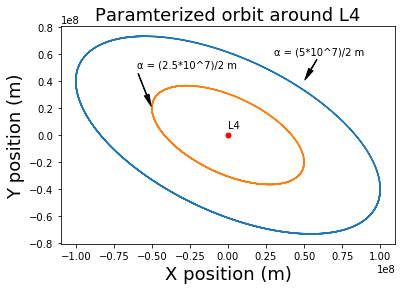

In [5]:
fig6=plt.figure()                 #Numbers in parentheses determine the dimensions of the plot
ax6=fig6.add_subplot(111)         #11 Means make a grid 1 plot box wide by 1 box tall.  
                                  #The final 1 means let ax1 be the first plot box.
    


t = np.linspace(0, 10**9, 1000)
x = 50000000*2*cos(1.67*10**-8*t)
y = 50000000*(-0.80133* cos(1.67*10**-8 *t) -1.23 * sin(1.67*10**-8 *t))

p = 25000000*2*cos(1.67*10**-8*t)
q = 25000000*(-0.80133* cos(1.67*10**-8 *t) -1.23 * sin(1.67*10**-8 *t))

ax6.plot(x, y)
ax6.plot(p, q)
#Plots a red point at (0, 0)
ax6.plot(0, 0, marker='o', markersize=5, color="red")
#Adds the label "L4" at a certain position on the graph
ax6.annotate('L4', xy=(0, 0), xytext=(0, 5*10**6))

ax6.annotate('α = (2.5*10^7)/2 m', xy=(-.5*10**8, .2*10**8), xytext=((-.6*10**8, .5*10**8)),
            arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=5),
            )

ax6.annotate('α = (5*10^7)/2 m', xy=(.5*10**8, .4*10**8), xytext=((.3*10**8, .6*10**8)),
            arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=5),
            )

ax6.set_title('Paramterized orbit around L4', fontsize=18)
ax6.set_xlabel('X position (m)', fontsize=18)
ax6.set_ylabel('Y position (m)', fontsize=18)